# Training the DL model
Now the vectors have been created, it's time to train the model...

Created 2025-02-07 by Andreas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
import numpy as np
import time
import re
from matplotlib.axes._axes import Axes as matplotlib_Axis

atom_vector_dict = {x:i for i, x in enumerate(["H", "C", "N", "O", "S"])}
residue_vector_dict = {x:i for i, x in enumerate(["ALA", "ARG", "ASN", "ASP", "CYS", "GLN", "GLU", "GLY", "HIS", "ILE", "LEU", "LYS", "MET", "PHE", "PRO", "SER", "THR", "TRP", "TYR", "VAL"])}

dist_classes_size = 0.25 # Angström
dist_classes_num = int(5//dist_classes_size) 
dist_classes_max = dist_classes_num*dist_classes_size # Angström
vector_size = dist_classes_num + 1 + len(residue_vector_dict)*2 + len(atom_vector_dict)*2
vector_offset_r1 = dist_classes_num + 1
vector_offset_r2 = vector_offset_r1 + len(residue_vector_dict)
vector_offset_a1 = vector_offset_r2 + len(residue_vector_dict) 
vector_offset_a2 = vector_offset_a1 + len(atom_vector_dict)
print(f"Vector size: {vector_size}; Atom 1 offset: {vector_offset_a1}, Atom 1 vector length: {len(atom_vector_dict)}")

Vector size: 71; Atom 1 offset: 61, Atom 1 vector length: 5


In [2]:
vector_dir = Path("./resources").resolve()


random_vectors_AF = pd.read_csv(vector_dir / "vectors_randomizedDMI.csv")
solved_vectors = pd.read_csv(vector_dir / "vectors_solved.csv")

display(random_vectors_AF)
display(solved_vectors)

,structure_name,PDB_id,ELM_instance,PDB_id_random_paired,ELM_instance_random_paired,sequence,sequence_mutated,chain,residue,dist_class,r1_class,r2_class,a1_class,a2_class
0,MDEG_APCC_KENBOX_2_4GGD.DTRG_AP2beta_CARGO_1_2G30,4GGD,MDEG_APCC_KENBOX_2,2G30,DTRG_AP2beta_CARGO_1,NaN,NaN,A,134,19,1,19,1,0
1,MDEG_APCC_KENBOX_2_4GGD.DTRG_AP2beta_CARGO_1_2G30,4GGD,MDEG_APCC_KENBOX_2,2G30,DTRG_AP2beta_CARGO_1,NaN,NaN,A,134,20,1,19,1,0
2,MDEG_APCC_KENBOX_2_4GGD.DTRG_AP2beta_CARGO_1_2G30,4GGD,MDEG_APCC_KENBOX_2,2G30,DTRG_AP2beta_CARGO_1,NaN,NaN,A,134,19,1,19,0,1
3,MDEG_APCC_KENBOX_2_4GGD.DTRG_AP2beta_CARGO_1_2G30,4GGD,MDEG_APCC_KENBOX_2,2G30,DTRG_AP2beta_CARGO_1,NaN,NaN,A,134,17,1,19,0,0
4,MDEG_APCC_KENBOX_2_4GGD.DTRG_AP2beta_CARGO_1_2G30,4GGD,MDEG_APCC_KENBOX_2,2G30,DTRG_AP2beta_CARGO_1,NaN,NaN,A,134,17,1,19,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257111,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,2C0L,MTRG_PTS1,4CY3,DLIG_WD40_WDR5_WIN_2,NaN,NaN,B,2,17,0,18,0,1
257112,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,2C0L,MTRG_PTS1,4CY3,DLIG_WD40_WDR5_WIN_2,NaN,NaN,B,2,19,0,18,1,0
257113,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,2C0L,MTRG_PTS1,4CY3,DLIG_WD40_WDR5_WIN_2,NaN,NaN,B,2,15,0,18,0,0
257114,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,2C0L,MTRG_PTS1,4CY3,DLIG_WD40_WDR5_WIN_2,NaN,NaN,B,2,20,0,18,0,1


,PDB_id,chain,residue,dist_class,r1_class,r2_class,a1_class,a2_class
0,1ATP,A,76,20,11,13,1,1
1,1ATP,A,76,17,11,13,1,1
2,1ATP,A,76,19,11,13,1,1
3,1ATP,A,76,20,11,13,1,0
4,1ATP,A,76,15,11,13,1,0
...,...,...,...,...,...,...,...,...
382945,7DS2,B,323,19,13,6,0,0
382946,7DS2,B,323,19,13,6,0,0
382947,7DS2,B,323,19,13,6,1,0
382948,7DS2,B,323,16,13,6,0,0


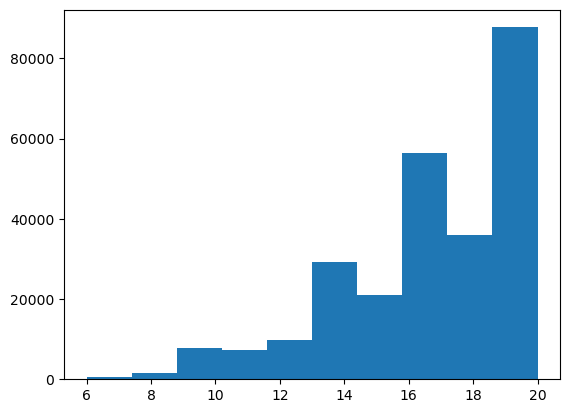

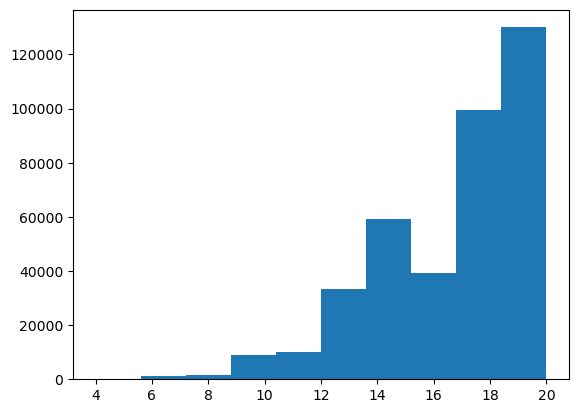

In [3]:
plt.hist(random_vectors_AF["dist_class"])
plt.show()
plt.hist(solved_vectors["dist_class"])
plt.show()

In [4]:
rnd =  np.random.default_rng(seed=2501)
pdb_ids = list(set(solved_vectors["PDB_id"]).union(random_vectors_AF["PDB_id"]).union(random_vectors_AF["PDB_id_random_paired"]))
print("Available PDB IDs:", len(pdb_ids))
rnd.shuffle(pdb_ids)
pdb_ids_training = pdb_ids[0:int(len(pdb_ids)*0.8)]
pdb_ids_test = pdb_ids[int(len(pdb_ids)*0.8):]
print("Training")
display(pdb_ids_training)
print("Test")
display(pdb_ids_test)

Available PDB IDs: 139
Training


['4BH6',
 '1KYU',
 '3UVK',
 '1PD7',
 '1L2Z',
 '2KQS',
 '2R02',
 '1SYQ',
 '2ZVL',
 '3VVW',
 '2V52',
 '2ROC',
 '4J2X',
 '2JQ9',
 '3QIS',
 '2CE8',
 '3TEI',
 '1GO4',
 '1YY6',
 '4H3B',
 '2D1K',
 '1YCR',
 '1NTV',
 '3MQS',
 '2GPH',
 '2P1Q',
 '4GGD',
 '4CY2',
 '2L8J',
 '2V3S',
 '2FLU',
 '1F95',
 '1S70',
 '2CCI',
 '2G30',
 '1B8Q',
 '1ZUB',
 '1ATP',
 '2I3S',
 '3GB8',
 '5VZU',
 '1CKA',
 '1AXC',
 '1DDV',
 '2B9J',
 '2JK9',
 '5AZG',
 '1H25',
 '2MOW',
 '4BXU',
 '1KKQ',
 '4CQO',
 '1EG4',
 '4F0Z',
 '2XS1',
 '2JKR',
 '1SXJ',
 '2Y48',
 '2A41',
 '4NEE',
 '1CZY',
 '5HKH',
 '1MKE',
 '1D5G',
 '1EVH',
 '5EOD',
 '2BZ8',
 '2ORZ',
 '5F74',
 '2O8G',
 '5MLW',
 '1GH6',
 '1M4P',
 '2XS0',
 '4H3Q',
 '2GBQ',
 '1N4M',
 '2ASQ',
 '2X04',
 '1PJM',
 '3RDV',
 '4KMD',
 '1KY7',
 '3SOQ',
 '2IX7',
 '3BQO',
 '1JGN',
 '2V8C',
 '1O6K',
 '6G84',
 '2PZO',
 '3WN7',
 '1B72',
 '2K42',
 '4YOC',
 '1UTC',
 '2W84',
 '4CY3',
 '1O9U',
 '5IGO',
 '2ODD',
 '3GM1',
 '1C9I',
 '3OGL',
 '3AA1',
 '6FUZ',
 '4EOY',
 '1GWQ',
 '1BXX',
 '1DPU',
 '3ZFW']

Test


['3WP0',
 '1CA9',
 '3EU7',
 '1KPS',
 '3UXG',
 '3HQM',
 '2C0L',
 '7DS2',
 '2LSI',
 '5ETA',
 '1ELR',
 '2A25',
 '1FF1',
 '3N5U',
 '1O0P',
 '2YKT',
 '1JD5',
 '4ZI2',
 '2KXH',
 '2RR3',
 '2ZNE',
 '2R03',
 '3TWU',
 '1JWG',
 '1NW9',
 '4FMO',
 '5FJX',
 '1MFG']

In [5]:
random_vectors_AF_training = random_vectors_AF[np.logical_and(~random_vectors_AF["PDB_id"].isin(pdb_ids_test), ~random_vectors_AF["PDB_id_random_paired"].isin(pdb_ids_test))]
random_vectors_AF_test = random_vectors_AF[np.logical_and(~random_vectors_AF["PDB_id"].isin(pdb_ids_training), ~random_vectors_AF["PDB_id_random_paired"].isin(pdb_ids_training))]
display(random_vectors_AF_training)
display(random_vectors_AF_test)

,structure_name,PDB_id,ELM_instance,PDB_id_random_paired,ELM_instance_random_paired,sequence,sequence_mutated,chain,residue,dist_class,r1_class,r2_class,a1_class,a2_class
0,MDEG_APCC_KENBOX_2_4GGD.DTRG_AP2beta_CARGO_1_2G30,4GGD,MDEG_APCC_KENBOX_2,2G30,DTRG_AP2beta_CARGO_1,NaN,NaN,A,134,19,1,19,1,0
1,MDEG_APCC_KENBOX_2_4GGD.DTRG_AP2beta_CARGO_1_2G30,4GGD,MDEG_APCC_KENBOX_2,2G30,DTRG_AP2beta_CARGO_1,NaN,NaN,A,134,20,1,19,1,0
2,MDEG_APCC_KENBOX_2_4GGD.DTRG_AP2beta_CARGO_1_2G30,4GGD,MDEG_APCC_KENBOX_2,2G30,DTRG_AP2beta_CARGO_1,NaN,NaN,A,134,19,1,19,0,1
3,MDEG_APCC_KENBOX_2_4GGD.DTRG_AP2beta_CARGO_1_2G30,4GGD,MDEG_APCC_KENBOX_2,2G30,DTRG_AP2beta_CARGO_1,NaN,NaN,A,134,17,1,19,0,0
4,MDEG_APCC_KENBOX_2_4GGD.DTRG_AP2beta_CARGO_1_2G30,4GGD,MDEG_APCC_KENBOX_2,2G30,DTRG_AP2beta_CARGO_1,NaN,NaN,A,134,17,1,19,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256385,MTRG_NLS_Bipartite_1_1PJM.DLIG_PDZ_Class_1_1D5G,1PJM,MTRG_NLS_Bipartite_1,1D5G,DLIG_PDZ_Class_1,NaN,NaN,B,5,13,0,1,0,1
256386,MTRG_NLS_Bipartite_1_1PJM.DLIG_PDZ_Class_1_1D5G,1PJM,MTRG_NLS_Bipartite_1,1D5G,DLIG_PDZ_Class_1,NaN,NaN,B,5,17,0,1,1,1
256387,MTRG_NLS_Bipartite_1_1PJM.DLIG_PDZ_Class_1_1D5G,1PJM,MTRG_NLS_Bipartite_1,1D5G,DLIG_PDZ_Class_1,NaN,NaN,B,5,18,0,1,1,1
256388,MTRG_NLS_Bipartite_1_1PJM.DLIG_PDZ_Class_1_1D5G,1PJM,MTRG_NLS_Bipartite_1,1D5G,DLIG_PDZ_Class_1,NaN,NaN,B,5,19,0,1,0,1


,structure_name,PDB_id,ELM_instance,PDB_id_random_paired,ELM_instance_random_paired,sequence,sequence_mutated,chain,residue,dist_class,r1_class,r2_class,a1_class,a2_class
89470,MLIG_BIR_III_2_1NW9.DDEG_SIAH_1_2A25,1NW9,MLIG_BIR_III_2,2A25,DDEG_SIAH_1,NaN,NaN,A,65,19,15,13,2,0
89471,MLIG_BIR_III_2_1NW9.DDEG_SIAH_1_2A25,1NW9,MLIG_BIR_III_2,2A25,DDEG_SIAH_1,NaN,NaN,A,65,18,15,13,2,0
89472,MLIG_BIR_III_2_1NW9.DDEG_SIAH_1_2A25,1NW9,MLIG_BIR_III_2,2A25,DDEG_SIAH_1,NaN,NaN,A,65,20,15,13,0,1
89473,MLIG_BIR_III_2_1NW9.DDEG_SIAH_1_2A25,1NW9,MLIG_BIR_III_2,2A25,DDEG_SIAH_1,NaN,NaN,A,65,16,15,13,0,0
89474,MLIG_BIR_III_2_1NW9.DDEG_SIAH_1_2A25,1NW9,MLIG_BIR_III_2,2A25,DDEG_SIAH_1,NaN,NaN,A,65,20,15,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221431,MLIG_TRAF2_1_1CA9.DLIG_BIR_III_3_1JD5,1CA9,MLIG_TRAF2_1,1JD5,DLIG_BIR_III_3,NaN,NaN,B,1,12,15,3,3,3
221432,MLIG_TRAF2_1_1CA9.DLIG_BIR_III_3_1JD5,1CA9,MLIG_TRAF2_1,1JD5,DLIG_BIR_III_3,NaN,NaN,B,1,9,15,3,3,3
221433,MLIG_TRAF2_1_1CA9.DLIG_BIR_III_3_1JD5,1CA9,MLIG_TRAF2_1,1JD5,DLIG_BIR_III_3,NaN,NaN,B,1,6,15,3,0,3
221434,MLIG_TRAF2_1_1CA9.DLIG_BIR_III_3_1JD5,1CA9,MLIG_TRAF2_1,1JD5,DLIG_BIR_III_3,NaN,NaN,B,1,20,15,17,0,1


In [6]:
solved_vectors_training = solved_vectors[solved_vectors["PDB_id"].isin(pdb_ids_training)].copy()
solved_vectors_test = solved_vectors[solved_vectors["PDB_id"].isin(pdb_ids_test)].copy()
display(solved_vectors_training)
display(solved_vectors_test)

,PDB_id,chain,residue,dist_class,r1_class,r2_class,a1_class,a2_class
0,1ATP,A,76,20,11,13,1,1
1,1ATP,A,76,17,11,13,1,1
2,1ATP,A,76,19,11,13,1,1
3,1ATP,A,76,20,11,13,1,0
4,1ATP,A,76,15,11,13,1,0
...,...,...,...,...,...,...,...,...
378541,6G84,B,87,16,0,5,0,3
378542,6G84,B,87,18,0,5,2,0
378543,6G84,B,87,19,0,5,1,0
378544,6G84,B,87,19,0,5,1,0


,PDB_id,chain,residue,dist_class,r1_class,r2_class,a1_class,a2_class
18960,1CA9,A,447,20,13,15,1,2
18961,1CA9,A,447,20,13,15,1,0
18962,1CA9,A,447,19,13,15,1,0
18963,1CA9,A,447,19,13,15,1,0
18964,1CA9,A,447,19,13,15,1,0
...,...,...,...,...,...,...,...,...
382945,7DS2,B,323,19,13,6,0,0
382946,7DS2,B,323,19,13,6,0,0
382947,7DS2,B,323,19,13,6,1,0
382948,7DS2,B,323,16,13,6,0,0


In [7]:
training_pdbids = set(solved_vectors_training["PDB_id"]).union(random_vectors_AF_training["PDB_id"]).union(random_vectors_AF_training["PDB_id_random_paired"])
test_pdbids = set(solved_vectors_test["PDB_id"]).union(random_vectors_AF_test["PDB_id"]).union(random_vectors_AF_test["PDB_id_random_paired"])
print(test_pdbids.intersection(training_pdbids))

set()


In [8]:
def interaction_classes_to_vector(dist_class, r1_class, r2_class, a1_class, a2_class):
    vector1 = np.full(shape=(vector_size,), fill_value=0)
    vector1[dist_class] = 1
    vector1[r1_class + vector_offset_r1] = 1
    vector1[r2_class + vector_offset_r2] = 1
    vector1[a1_class + vector_offset_a1] = 1
    vector1[a2_class + vector_offset_a2] = 1
    return vector1

In [14]:
xtrain_dict = {}
ytrain_dict = {}
for i, r in random_vectors_AF_training.iterrows():
    name = f"{r['PDB_id']}-{r['PDB_id_random_paired']}_{r['chain']}{r['residue']}"
    if name not in xtrain_dict.keys():
        xtrain_dict[name] = []
        ytrain_dict[name] = 0
    xtrain_dict[name].append(interaction_classes_to_vector(r["dist_class"], r["r1_class"], r["r2_class"], r["a1_class"], r["a2_class"]))

for i, r in solved_vectors_training.iterrows():
    name = f"{r['PDB_id']}_{r['chain']}{r['residue']}"
    if name not in xtrain_dict.keys():
        xtrain_dict[name] = []
        ytrain_dict[name] = 1
    xtrain_dict[name].append(interaction_classes_to_vector(r["dist_class"], r["r1_class"], r["r2_class"], r["a1_class"], r["a2_class"]))

In [15]:
x_train = np.array([a for a in xtrain_dict.values()])
x_train

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3190,) + inhomogeneous part.

In [12]:
xtrain = np.array(xtrain_dict)
xtrain.shape

()

## Tensorflow

In [67]:
import keras

In [ ]:
model = keras.Sequential()
model.add()